### Import libraries

In [2]:
!pip install folium

     |████████████████████████████████| 94 kB 5.9 MB/s  eta 0:00:01


In [3]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
import folium # map rendering library

# Getting Data

### 1- Dataframe of ethnic diversity of Toronto

Scraping HTML Tables from wiki page:'https://en.wikipedia.org/wiki/Demographics_of_Toronto'

#### Creating Dataframe Ethnic diversity from scrapped Table 

In [4]:
url='https://en.wikipedia.org/wiki/Demographics_of_Toronto'
tables = pd.read_html(url)
print("There are : ",len(tables)," tables")
T1= tables[12]
T2= tables[13]
T3= tables[14]
T4= tables[15]

There are :  38  tables


In [5]:
print("Table of Toronto & East York neighborhoods")
print(T1.shape)
T1

Table of Toronto & East York neighborhoods
(8, 20)


,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Table of North York neighborhoods")
print(T2.shape)
T2

Table of North York neighborhoods
(7, 18)


,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [7]:
print("Table of Scarborough neighborhoods")
print(T3.shape)
T3

Table of Scarborough neighborhoods
(6, 18)


,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Table of Etobicoke & York neighborhoods")
print(T4.shape)
T4

Table of Etobicoke & York neighborhoods
(4, 18)


,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Mycolumns = ['Riding', 'Population', 'Ethnic Origin #1', '%', 'Ethnic Origin #2',
       '%.1', 'Ethnic Origin #3', '%.2', 'Ethnic Origin #4', '%.3']
frames = [T1[Mycolumns], T2[Mycolumns], T3[Mycolumns], T4[Mycolumns]]

Ethnic_df = pd.concat(frames,axis=0,sort=False,ignore_index=True)

In [10]:
Ethnic_df.shape

(25, 10)

In [11]:
Ethnic_df.head()

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4


Rename columns

In [12]:
#Rename column 'Neighbourhood'
Ethnic_df.rename(columns = {'Riding' : 'Neighborhood','%':'Percentage #1',
                            '%.1':'Percentage #2','%.2':'Percentage #3','%.3':'Percentage #4'},inplace = True)

In [13]:
Ethnic_df.fillna(0,inplace=True)

In [14]:
print('The data frame of 4 first Ethnic groups distribution per Neighborhood')
Ethnic_df.head()

The data frame of 4 first Ethnic groups distribution per Neighborhood


,Neighborhood,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4


## 2- Adding geopgraphical coordinates

using geopy.geocoders package

In [15]:
from geopy.geocoders import Nominatim
import time

In [16]:
def get_location_by_address(address):
    """This function returns a location as raw from an address
    will repeat until success"""
    time.sleep(1)
    try:
        return app.geocode(address).raw
    except:
        return get_location_by_address(address)

In [17]:
Ethnic_df.insert(Ethnic_df.shape[1], "Latitude", 0,True) 
Ethnic_df.insert(Ethnic_df.shape[1], "Longitude", 0,True)
Ethnic_df

,Neighborhood,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,0,0
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,0,0
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,0,0
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,0,0
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,0,0
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,0,0
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,0,0
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,0,0
8,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,0,0.0,0,0
9,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,0,0


In [18]:
# instantiate a new Nominatim client
app = Nominatim(user_agent="tutorial")

for ind in range(0,len(Ethnic_df['Neighborhood'])):
    address = Ethnic_df['Neighborhood'][ind]
    if address == 'Davenport':
        print(address)
        address = address +' Toronto'
        print(address)
    
    # get location raw data
    location = get_location_by_address(address)
    
    Ethnic_df['Latitude'][ind] = location["lat"]
    Ethnic_df['Longitude'][ind] = location["lon"]
    #print(f"{latitude}, {longitude}")


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Davenport
Davenport Toronto


##### New Ethnic dataframe with geographical coordinates

In [19]:
print('Dimensions of the New Ethnic dataframe: {:d},{:d}\n'.format(Ethnic_df.shape[0],Ethnic_df.shape[1]))
Ethnic_df.head()

Dimensions of the New Ethnic dataframe: 25,12



,Neighborhood,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,43.6416088,-79.3962675
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,43.6814698,-79.3060214
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,43.6715454,-79.4483222
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,43.6499649,-79.473014
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,43.6789439,-79.3448597


# 3- Dataset of Neighborhood characteristics

Using Toronto Ward profiles "https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/ward-profiles/"

In [23]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0345c2e43508494cb306f9a4010616ea = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KS-p9NSllX-3xfKzUXElw6cgqC5NI-DGwLioPm4VnAdC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0345c2e43508494cb306f9a4010616ea.get_object(Bucket='courseracapstoneproject-donotdelete-pr-wj6urlszhz5bpr',Key='data_toronto.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Toronto_df = pd.read_csv(body)


Toronto_df.shape

(25, 6)

In [24]:
Toronto_df.head()

,Unnamed: 0,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment
0,0,Scarborough Centre,70624,40,39.8,9.4
1,1,Scarborough Southwest,78561,39,40.6,9.8
2,2,Scarborough-Agincourt,75768,49,44.4,9.9
3,3,Scarborough-Rouge Park,99715,19,40.9,8.9
4,4,Scarborough-Guildwood,72289,39,38.2,11.1


In [25]:
print(Ethnic_df.shape)
Ethnic_df

(25, 12)


,Neighborhood,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,43.6416088,-79.3962675
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,43.6814698,-79.3060214
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,43.6715454,-79.4483222
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,43.6499649,-79.473014
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,43.6789439,-79.3448597
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,43.687689,-79.4169647
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,43.663336,-79.3918111
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,43.6604085,-79.3685708
8,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,0,0.0,43.7615095,-79.4109234
9,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,43.7192647,-79.429765


### Merge Toronto dataframe and the ethnic dataframe

In [26]:
df = pd.merge(Toronto_df, Ethnic_df, on='Neighborhood')

In [27]:
df.shape

(25, 17)

In [28]:
df.head()

,Unnamed: 0,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude
0,0,Scarborough Centre,70624,40,39.8,9.4,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,43.7475018,-79.284828
1,1,Scarborough Southwest,78561,39,40.6,9.8,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,43.7010356,-79.2549582
2,2,Scarborough-Agincourt,75768,49,44.4,9.9,104225,Chinese,47.0,East Indian,7.4,0,0.0,0,0.0,43.7967785,-79.315759
3,3,Scarborough-Rouge Park,99715,19,40.9,8.9,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,43.8083627,-79.1708032
4,4,Scarborough-Guildwood,72289,39,38.2,11.1,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,43.7618571,-79.2158124


# 4- List of venues in Toronto's neighborhoods

 Using FourSquare API to explore the neighborhoods

Define Foursquare Credentials and Version

In [29]:
CLIENT_ID = 'RBS2WCR1KGYQV3V1QG31ZRMSCG0EOFL2XCJKNTCURQUUHMIF' # your Foursquare ID
CLIENT_SECRET = '3VATX5JF41RGCJCALYAN5NKLWCXT3VJPLW2J2OTQS4DTXCJ5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RBS2WCR1KGYQV3V1QG31ZRMSCG0EOFL2XCJKNTCURQUUHMIF
CLIENT_SECRET:3VATX5JF41RGCJCALYAN5NKLWCXT3VJPLW2J2OTQS4DTXCJ5


In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
Toronto_venues = getNearbyVenues(names = df['Neighborhood'],
                                 latitudes = df['Latitude'],
                                 longitudes = df['Longitude']
                                  )

Scarborough Centre
Scarborough Southwest
Scarborough-Agincourt
Scarborough-Rouge Park
Scarborough-Guildwood
Scarborough North
Spadina-Fort York
Beaches-East York
Davenport
Parkdale-High Park
Toronto-Danforth
Toronto-St. Paul's
University-Rosedale
Toronto Centre
Willowdale
Eglinton-Lawrence
Don Valley North
Humber River-Black Creek
York Centre
Don Valley West
Don Valley East
Etobicoke-Lakeshore
Etobicoke North
Etobicoke Centre
York South-Weston


In [33]:
print(Toronto_venues.shape)
Toronto_venues

(469, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough Centre,43.7475018,-79.284828,McGregor Park,43.747842,-79.280138,Park
1,Scarborough Centre,43.7475018,-79.284828,OM KALTHOUM CAFE,43.747334,-79.283827,Hookah Bar
2,Scarborough Centre,43.7475018,-79.284828,Swiss Chalet,43.746304,-79.289240,Restaurant
3,Scarborough Centre,43.7475018,-79.284828,Kim Ling Indian Chinese Restaurant,43.747401,-79.284002,Indian Chinese Restaurant
4,Scarborough Centre,43.7475018,-79.284828,Coffee In,43.747544,-79.283606,Filipino Restaurant
...,...,...,...,...,...,...,...
464,Etobicoke Centre,43.6798327,-79.5389927,Silvercreek Park,43.684095,-79.540633,Park
465,York South-Weston,43.6844658,-79.4988181,Scarlett Woods Golf Course,43.683401,-79.500203,Golf Course
466,York South-Weston,43.6844658,-79.4988181,Fergy Brown park,43.686723,-79.497952,Park
467,York South-Weston,43.6844658,-79.4988181,Eglinton Flats Tennis,43.684951,-79.494683,Tennis Court


Let's check how many venues were returned for each neighborhood

#### Dataframe of only venues of category "Restaurant"

In [34]:
df_resto = Toronto_venues[Toronto_venues['Venue Category'].str.contains('Restaurant')]
df_resto = df_resto.append(Toronto_venues[Toronto_venues['Venue Category'].str.contains('Pizza')])
len(df_resto['Neighborhood'].unique())

18

In [35]:
#df_resto_sorted = df_resto.groupby(['Neighborhood'], as_index=True)
#df_resto_sorted.head()
df_resto_sorted = pd.DataFrame({'#Total Resto' : df_resto.groupby( [ "Neighborhood"] ).size()}).reset_index()
df_resto_sorted

,Neighborhood,#Total Resto
0,Beaches-East York,2
1,Don Valley North,13
2,Eglinton-Lawrence,3
3,Etobicoke North,2
4,Etobicoke-Lakeshore,4
5,Parkdale-High Park,10
6,Scarborough Centre,3
7,Scarborough North,1
8,Scarborough Southwest,1
9,Scarborough-Agincourt,4


### Dataframe of only venues of category "Italian Restaurant"

In [36]:

df_resto_it = Toronto_venues[Toronto_venues['Venue Category'].str.contains('Italian Restaurant')]
df_resto_it = df_resto_it.append(Toronto_venues[Toronto_venues['Venue Category'].str.contains('Pizza')])
df_resto_it

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
52,Spadina-Fort York,43.6416088,-79.3962675,Bar Buca,43.643918,-79.399742,Italian Restaurant
54,Spadina-Fort York,43.6416088,-79.3962675,Pizzeria Libretto,43.644449,-79.398759,Italian Restaurant
64,Spadina-Fort York,43.6416088,-79.3962675,Gusto 101,43.644988,-79.400270,Italian Restaurant
112,Parkdale-High Park,43.6499649,-79.473014,Queen's Pasta Café,43.650707,-79.477978,Italian Restaurant
149,Toronto-Danforth,43.6789439,-79.3448597,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
162,Toronto-Danforth,43.6789439,-79.3448597,IL FORNELLO on Danforth,43.678604,-79.346904,Italian Restaurant
213,Toronto-St. Paul's,43.687689,-79.4169647,Pizza Banfi,43.688064,-79.414547,Italian Restaurant
241,University-Rosedale,43.663336,-79.3918111,Mercatto,43.660391,-79.387664,Italian Restaurant
269,Toronto Centre,43.6604085,-79.3685708,Hey Lucy,43.664075,-79.368655,Italian Restaurant
23,Scarborough-Agincourt,43.7967785,-79.315759,Pizza Pizza,43.797909,-79.318113,Pizza Place


Number of italian resto and pizza place

In [37]:
df.insert(df.shape[1], "#Pizza Resto", 0,True) 
df.insert(df.shape[1], "#Italian Resto", 0,True)
df


,Unnamed: 0,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto
0,0,Scarborough Centre,70624,40,39.8,9.4,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,43.7475018,-79.284828,0,0
1,1,Scarborough Southwest,78561,39,40.6,9.8,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,43.7010356,-79.2549582,0,0
2,2,Scarborough-Agincourt,75768,49,44.4,9.9,104225,Chinese,47.0,East Indian,7.4,0,0.0,0,0.0,43.7967785,-79.315759,0,0
3,3,Scarborough-Rouge Park,99715,19,40.9,8.9,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,43.8083627,-79.1708032,0,0
4,4,Scarborough-Guildwood,72289,39,38.2,11.1,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,43.7618571,-79.2158124,0,0
5,5,Scarborough North,78984,32,41.5,9.9,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,0,0.0,43.8099025,-79.2576834,0,0
6,6,Spadina-Fort York,103047,62,32.4,5.1,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,43.6416088,-79.3962675,0,0
7,7,Beaches-East York,104123,65,40.4,8.0,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,43.6814698,-79.3060214,0,0
8,8,Davenport,80807,90,36.7,7.1,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,43.6715454,-79.4483222,0,0
9,9,Parkdale-High Park,99784,71,38.4,6.8,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,43.6499649,-79.473014,0,0


In [38]:
#.sort_values('Neighborhood',ascending=False)
df_resto_it_sorted = df_resto_it.groupby(['Venue Category'], as_index=True)
df_resto_it_sorted.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
52,Spadina-Fort York,43.6416088,-79.3962675,Bar Buca,43.643918,-79.399742,Italian Restaurant
54,Spadina-Fort York,43.6416088,-79.3962675,Pizzeria Libretto,43.644449,-79.398759,Italian Restaurant
64,Spadina-Fort York,43.6416088,-79.3962675,Gusto 101,43.644988,-79.400270,Italian Restaurant
112,Parkdale-High Park,43.6499649,-79.473014,Queen's Pasta Café,43.650707,-79.477978,Italian Restaurant
149,Toronto-Danforth,43.6789439,-79.3448597,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
23,Scarborough-Agincourt,43.7967785,-79.315759,Pizza Pizza,43.797909,-79.318113,Pizza Place
28,Scarborough-Agincourt,43.7967785,-79.315759,Domino's Pizza,43.793565,-79.315464,Pizza Place
100,Beaches-East York,43.6814698,-79.3060214,Domino's Pizza,43.683816,-79.301366,Pizza Place
132,Parkdale-High Park,43.6499649,-79.473014,Pizza Hut,43.652612,-79.470999,Pizza Place
136,Parkdale-High Park,43.6499649,-79.473014,Pizza Pizza,43.650891,-79.477134,Pizza Place


In [39]:
test = pd.DataFrame({'count' : df_resto_it.groupby( [ "Neighborhood", "Venue Category"] ).size()}).reset_index()
test.head()

,Neighborhood,Venue Category,count
0,Beaches-East York,Pizza Place,1
1,Etobicoke North,Pizza Place,1
2,Etobicoke-Lakeshore,Pizza Place,1
3,Parkdale-High Park,Italian Restaurant,1
4,Parkdale-High Park,Pizza Place,2


In [40]:

for neigh,cat,ind in zip(test['Neighborhood'],test['Venue Category'],test['count']):
    if cat == 'Pizza Place':
        df.loc[df['Neighborhood'] == neigh,'#Pizza Resto'] = ind
    else:
        df.loc[df['Neighborhood'] == neigh,'#Italian Resto'] = ind
              

In [41]:
df

,Unnamed: 0,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto
0,0,Scarborough Centre,70624,40,39.8,9.4,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,43.7475018,-79.284828,0,0
1,1,Scarborough Southwest,78561,39,40.6,9.8,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,43.7010356,-79.2549582,0,0
2,2,Scarborough-Agincourt,75768,49,44.4,9.9,104225,Chinese,47.0,East Indian,7.4,0,0.0,0,0.0,43.7967785,-79.315759,2,0
3,3,Scarborough-Rouge Park,99715,19,40.9,8.9,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,43.8083627,-79.1708032,0,0
4,4,Scarborough-Guildwood,72289,39,38.2,11.1,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,43.7618571,-79.2158124,0,0
5,5,Scarborough North,78984,32,41.5,9.9,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,0,0.0,43.8099025,-79.2576834,0,0
6,6,Spadina-Fort York,103047,62,32.4,5.1,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,43.6416088,-79.3962675,0,3
7,7,Beaches-East York,104123,65,40.4,8.0,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,43.6814698,-79.3060214,1,0
8,8,Davenport,80807,90,36.7,7.1,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,43.6715454,-79.4483222,0,0
9,9,Parkdale-High Park,99784,71,38.4,6.8,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,43.6499649,-79.473014,2,1


In [42]:
df_resto_sorted

,Neighborhood,#Total Resto
0,Beaches-East York,2
1,Don Valley North,13
2,Eglinton-Lawrence,3
3,Etobicoke North,2
4,Etobicoke-Lakeshore,4
5,Parkdale-High Park,10
6,Scarborough Centre,3
7,Scarborough North,1
8,Scarborough Southwest,1
9,Scarborough-Agincourt,4


In [43]:
print(df.shape)
print(df_resto_sorted.shape)

(25, 19)
(18, 2)


In [44]:
df_final = pd.merge(df, df_resto_sorted, on='Neighborhood',how='outer')
df_final.shape

(25, 20)

In [45]:
df_final

,Unnamed: 0,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
0,0,Scarborough Centre,70624,40,39.8,9.4,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,43.7475018,-79.284828,0,0,3.0
1,1,Scarborough Southwest,78561,39,40.6,9.8,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,43.7010356,-79.2549582,0,0,1.0
2,2,Scarborough-Agincourt,75768,49,44.4,9.9,104225,Chinese,47.0,East Indian,7.4,0,0.0,0,0.0,43.7967785,-79.315759,2,0,4.0
3,3,Scarborough-Rouge Park,99715,19,40.9,8.9,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,43.8083627,-79.1708032,0,0,NaN
4,4,Scarborough-Guildwood,72289,39,38.2,11.1,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,43.7618571,-79.2158124,0,0,2.0
5,5,Scarborough North,78984,32,41.5,9.9,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,0,0.0,43.8099025,-79.2576834,0,0,1.0
6,6,Spadina-Fort York,103047,62,32.4,5.1,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,43.6416088,-79.3962675,0,3,16.0
7,7,Beaches-East York,104123,65,40.4,8.0,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,43.6814698,-79.3060214,1,0,2.0
8,8,Davenport,80807,90,36.7,7.1,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,43.6715454,-79.4483222,0,0,NaN
9,9,Parkdale-High Park,99784,71,38.4,6.8,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,43.6499649,-79.473014,2,1,10.0


In [46]:
df_final.fillna(0,inplace=True)

In [47]:
df_final

,Unnamed: 0,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
0,0,Scarborough Centre,70624,40,39.8,9.4,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,43.7475018,-79.284828,0,0,3.0
1,1,Scarborough Southwest,78561,39,40.6,9.8,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,43.7010356,-79.2549582,0,0,1.0
2,2,Scarborough-Agincourt,75768,49,44.4,9.9,104225,Chinese,47.0,East Indian,7.4,0,0.0,0,0.0,43.7967785,-79.315759,2,0,4.0
3,3,Scarborough-Rouge Park,99715,19,40.9,8.9,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,43.8083627,-79.1708032,0,0,0.0
4,4,Scarborough-Guildwood,72289,39,38.2,11.1,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,43.7618571,-79.2158124,0,0,2.0
5,5,Scarborough North,78984,32,41.5,9.9,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,0,0.0,43.8099025,-79.2576834,0,0,1.0
6,6,Spadina-Fort York,103047,62,32.4,5.1,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,43.6416088,-79.3962675,0,3,16.0
7,7,Beaches-East York,104123,65,40.4,8.0,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,43.6814698,-79.3060214,1,0,2.0
8,8,Davenport,80807,90,36.7,7.1,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,43.6715454,-79.4483222,0,0,0.0
9,9,Parkdale-High Park,99784,71,38.4,6.8,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,43.6499649,-79.473014,2,1,10.0


# Data visualization
------

## An interactive leaflet map of toronto using Folium library 

In [48]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [49]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neigh,eth1,eth2 in zip(df['Latitude'], df['Longitude'], 
                                     df['Neighborhood'],df['Ethnic Origin #1'],df['Ethnic Origin #2']):
    label = '{}, {},{}'.format(neigh,eth1,eth2)
    label = folium.Popup(label, parse_html=True)
    if eth1 == 'Italian' or eth2 == 'Italian' :
        folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
    else:
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Relationship between Average Income  and number of restaurant

In [50]:
# subdataframe
df_income = df_final[['Neighborhood','AVG Income','#Pizza Resto','#Italian Resto','#Total Resto']]
#df_income.set_index('Neighborhood',inplace=True,drop=True)

AVG Income by neighborhood

Text(0.5, 1.0, 'AVG Income ')

<Figure size 432x288 with 0 Axes>

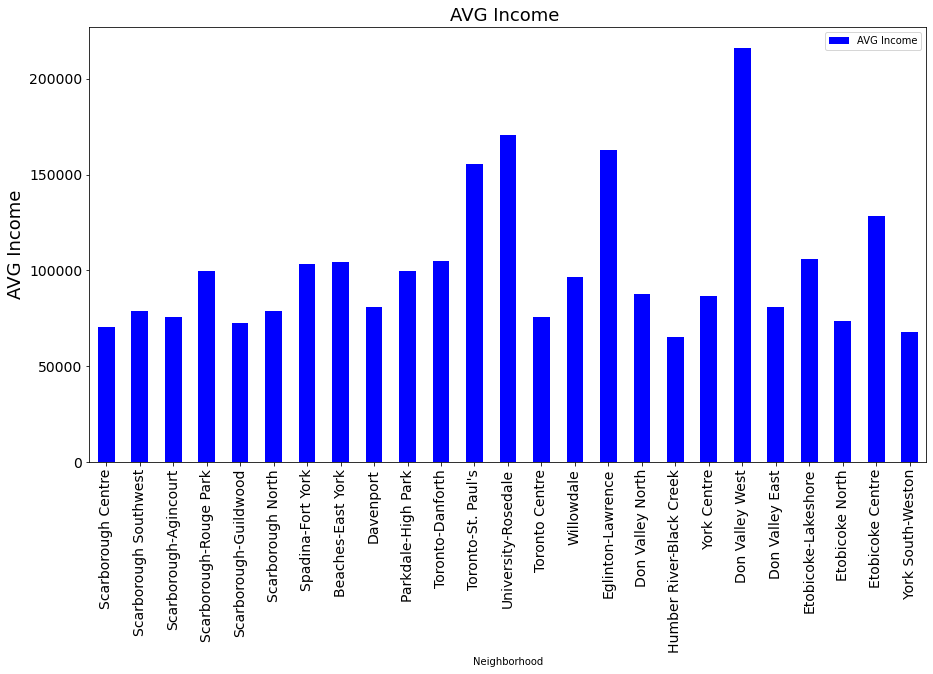

In [51]:
# generate plot
plt.figure()
df.plot(x="Neighborhood", y=["AVG Income"], kind="bar",figsize=(15, 8),color ='blue',fontsize=14)
#df_income.plot(kind='bar', figsize=(15, 10),width=0.5,color=['blue','red','green'])
plt.ylabel('AVG Income',fontsize=18)
plt.title('AVG Income ',fontsize=18)

 Relationship between Italian group and 

In [52]:
# normalizer les donnees
from sklearn.preprocessing import MinMaxScaler
# define standard scaler
scaler = MinMaxScaler()
num_cols = df_income.columns[df_income.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
df_income[num_cols] = scaler.fit_transform(df_income[num_cols])
df_income

#df_scaled = pd.DataFrame(scaler.fit_transform(df_income[['AVG Income','#Pizza Resto','#Italian Resto']]),columns = df_income.columns)
#df_scaled
# transform data
#data = scaler.fit_transform(df_income[['AVG Income','#Pizza Resto','#Italian Resto']])
#print(type(data))

#data_df = pd.DataFrame(data)
#data_df



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,AVG Income,#Pizza Resto,#Italian Resto,#Total Resto
0,Scarborough Centre,0.034280,0.000000,0.000000,0.125000
1,Scarborough Southwest,0.086948,0.000000,0.000000,0.041667
2,Scarborough-Agincourt,0.068414,0.666667,0.000000,0.166667
3,Scarborough-Rouge Park,0.227319,0.000000,0.000000,0.000000
4,Scarborough-Guildwood,0.045328,0.000000,0.000000,0.083333
5,Scarborough North,0.089754,0.000000,0.000000,0.041667
6,Spadina-Fort York,0.249429,0.000000,1.000000,0.666667
7,Beaches-East York,0.256569,0.333333,0.000000,0.083333
8,Davenport,0.101851,0.000000,0.000000,0.000000
9,Parkdale-High Park,0.227777,0.666667,0.333333,0.416667


<Figure size 432x288 with 0 Axes>

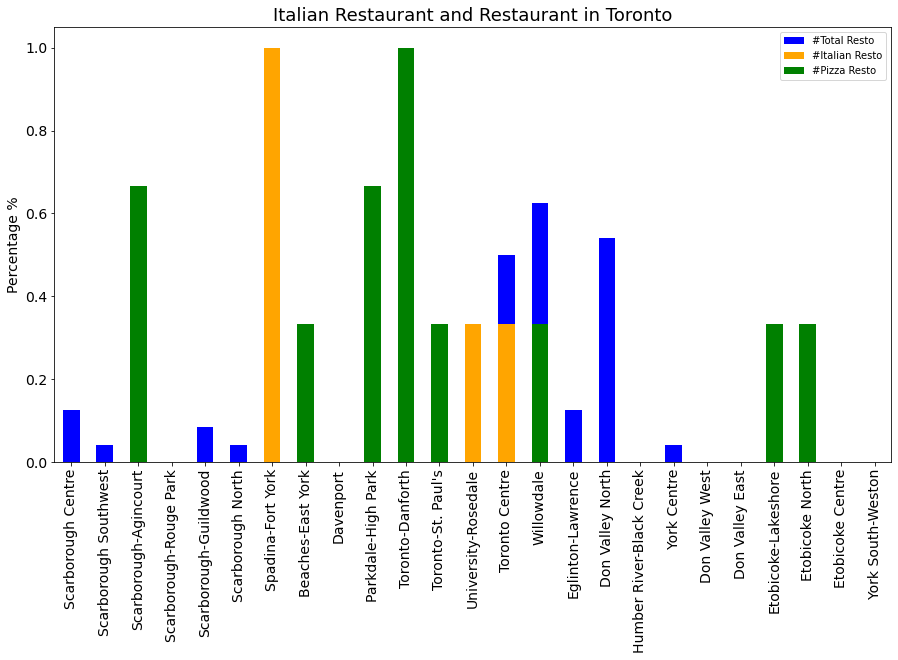

In [53]:
plt.figure()
#df.plot(x="Neighborhood", y=['#Pizza Resto','#Italian Resto'], kind="bar",figsize=(15, 10),color =['blue','red'] )
#ax = df_income.plot(x="Neighborhood", y="AVG Income", kind="bar",figsize=(15, 10),color =['red'],fontsize=14)
ax= df_income.plot(x="Neighborhood", y="#Total Resto", kind="bar", figsize=(15, 8), color="blue",fontsize=14)
df_income.plot(x="Neighborhood", y="#Italian Resto", kind="bar", ax=ax, color="Orange",fontsize=14)
df_income.plot(x="Neighborhood", y="#Pizza Resto", kind="bar", ax=ax, color="green",fontsize=14)
plt.xlabel('')
plt.ylabel('Percentage %', fontsize=14)
plt.title('Italian Restaurant and Restaurant in Toronto',fontsize=18)

    # annotate value labels to each country
'''for index, value in enumerate(df_income): 
    label = format(int(value), ',') # format int with commas
    print(label)
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    #plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')'''

plt.show()

# Clustering

In [54]:
# Library for clustering
from sklearn.cluster import KMeans

In [55]:
df_final

,Unnamed: 0,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
0,0,Scarborough Centre,70624,40,39.8,9.4,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,43.7475018,-79.284828,0,0,3.0
1,1,Scarborough Southwest,78561,39,40.6,9.8,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,43.7010356,-79.2549582,0,0,1.0
2,2,Scarborough-Agincourt,75768,49,44.4,9.9,104225,Chinese,47.0,East Indian,7.4,0,0.0,0,0.0,43.7967785,-79.315759,2,0,4.0
3,3,Scarborough-Rouge Park,99715,19,40.9,8.9,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,43.8083627,-79.1708032,0,0,0.0
4,4,Scarborough-Guildwood,72289,39,38.2,11.1,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,43.7618571,-79.2158124,0,0,2.0
5,5,Scarborough North,78984,32,41.5,9.9,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,0,0.0,43.8099025,-79.2576834,0,0,1.0
6,6,Spadina-Fort York,103047,62,32.4,5.1,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,43.6416088,-79.3962675,0,3,16.0
7,7,Beaches-East York,104123,65,40.4,8.0,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,43.6814698,-79.3060214,1,0,2.0
8,8,Davenport,80807,90,36.7,7.1,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,43.6715454,-79.4483222,0,0,0.0
9,9,Parkdale-High Park,99784,71,38.4,6.8,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,43.6499649,-79.473014,2,1,10.0


In [56]:

df_final_clustering = df_final.drop('Neighborhood', 1)
df_final_clustering = df_final_clustering.drop('Ethnic Origin #1', 1)
df_final_clustering = df_final_clustering.drop('Ethnic Origin #2', 1)
df_final_clustering = df_final_clustering.drop('Ethnic Origin #3', 1)
df_final_clustering = df_final_clustering.drop('Ethnic Origin #4', 1)
df_final_clustering = df_final_clustering.drop('Latitude', 1)
df_final_clustering = df_final_clustering.drop('Longitude', 1)
df_final_clustering.shape

(25, 13)

In [57]:
df_final_clustering.head()

,Unnamed: 0,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Percentage #1,Percentage #2,Percentage #3,Percentage #4,#Pizza Resto,#Italian Resto,#Total Resto
0,0,70624,40,39.8,9.4,110450,13.1,12.2,11.2,10.7,0,0,3.0
1,1,78561,39,40.6,9.8,108295,16.2,14.3,11.5,10.9,0,0,1.0
2,2,75768,49,44.4,9.9,104225,47.0,7.4,0.0,0.0,2,0,4.0
3,3,99715,19,40.9,8.9,101445,16.7,11.8,11.1,9.8,0,0,0.0
4,4,72289,39,38.2,11.1,101115,18.0,11.6,9.7,8.5,0,0,2.0


In [58]:

df_final_clustering = df_final_clustering.reset_index()
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 3, 0, 4, 0, 2,
       3, 5, 3], dtype=int32)

In [59]:
# add clustering labels
df_final.insert(0, 'Cluster Labels', kmeans.labels_)

#borough_toronto_merged = new_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
#borough_toronto_merged = borough_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

df_final.head() # check the last columns!

,Cluster Labels,Unnamed: 0,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,...,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
0,3,0,Scarborough Centre,70624,40,39.8,9.4,110450,Filipino,13.1,...,12.2,Canadian,11.2,Chinese,10.7,43.7475018,-79.284828,0,0,3.0
1,0,1,Scarborough Southwest,78561,39,40.6,9.8,108295,Canadian,16.2,...,14.3,Irish,11.5,Scottish,10.9,43.7010356,-79.2549582,0,0,1.0
2,0,2,Scarborough-Agincourt,75768,49,44.4,9.9,104225,Chinese,47.0,...,7.4,0,0.0,0,0.0,43.7967785,-79.315759,2,0,4.0
3,2,3,Scarborough-Rouge Park,99715,19,40.9,8.9,101445,East Indian,16.7,...,11.8,Sri Lankan,11.1,English,9.8,43.8083627,-79.1708032,0,0,0.0
4,0,4,Scarborough-Guildwood,72289,39,38.2,11.1,101115,East Indian,18.0,...,11.6,English,9.7,Filipino,8.5,43.7618571,-79.2158124,0,0,2.0


Finally, let's visualize the resulting clusters

In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, eth in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighborhood'], 
                                       df_final['Cluster Labels'],df_final['Ethnic Origin #1']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+str(eth), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

'''for lat, lng, neigh,eth1,eth2 in zip(df['Latitude'], df['Longitude'], 
                                     df['Neighborhood'],df['Ethnic Origin #1'],df['Ethnic Origin #2']):
    label = '{}, {},{}'.format(neigh,eth1,eth2)
    label = folium.Popup(label, parse_html=True)
    if eth1 == 'Italian' or eth2 == 'Italian' :
        folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)  '''
           
map_clusters

# Examine Clusters

#### Cluster 1

In [61]:
df_cluster1=df_final.loc[df_final['Cluster Labels'] == 0, df_final.columns[[2] + list(range(3, df_final.shape[1]))]]

In [62]:
df_cluster1

,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
1,Scarborough Southwest,78561,39,40.6,9.8,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,43.7010356,-79.2549582,0,0,1.0
2,Scarborough-Agincourt,75768,49,44.4,9.9,104225,Chinese,47.0,East Indian,7.4,0,0.0,0,0.0,43.7967785,-79.315759,2,0,4.0
4,Scarborough-Guildwood,72289,39,38.2,11.1,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,43.7618571,-79.2158124,0,0,2.0
5,Scarborough North,78984,32,41.5,9.9,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,0,0.0,43.8099025,-79.2576834,0,0,1.0
8,Davenport,80807,90,36.7,7.1,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,43.6715454,-79.4483222,0,0,0.0
13,Toronto Centre,75382,184,35.3,8.8,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,43.6604085,-79.3685708,0,1,12.0
16,Don Valley North,87491,45,41.1,9.0,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,0,0.0,43.7750911,-79.3470385,0,0,13.0
18,York Centre,86717,29,40.8,7.7,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,43.750241,-79.463352,0,0,1.0
20,Don Valley East,80648,41,40.9,9.3,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,43.7305734,-79.3342029,0,0,0.0


#### Cluster 2

In [63]:
df_cluster2 = df_final.loc[df_final['Cluster Labels'] == 1, df_final.columns[[2] + list(range(3, df_final.shape[1]))]]

In [64]:
df_cluster2

,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
11,Toronto-St. Paul's,155470,79,40.2,6.3,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,43.687689,-79.4169647,1,1,5.0
12,University-Rosedale,170832,77,35.6,7.3,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,43.663336,-79.3918111,0,1,2.0
15,Eglinton-Lawrence,162674,50,40.0,7.5,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,43.7192647,-79.429765,0,0,3.0


#### Cluster 3

In [65]:
df_cluster3=df_final.loc[df_final['Cluster Labels'] == 2, df_final.columns[[2] + list(range(3, df_final.shape[1]))]]

In [66]:
df_cluster3

,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
3,Scarborough-Rouge Park,99715,19,40.9,8.9,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,43.8083627,-79.1708032,0,0,0.0
6,Spadina-Fort York,103047,62,32.4,5.1,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,43.6416088,-79.3962675,0,3,16.0
7,Beaches-East York,104123,65,40.4,8.0,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,43.6814698,-79.3060214,1,0,2.0
9,Parkdale-High Park,99784,71,38.4,6.8,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,43.6499649,-79.473014,2,1,10.0
10,Toronto-Danforth,105059,45,39.0,6.6,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,43.6789439,-79.3448597,3,2,24.0
14,Willowdale,96321,37,43.8,8.1,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,0,0.0,43.7615095,-79.4109234,1,0,15.0
21,Etobicoke-Lakeshore,105994,32,41.1,6.8,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,43.6046194,-79.4981677,1,0,4.0


#### Cluster 4

In [67]:
df_cluster4=df_final.loc[df_final['Cluster Labels'] ==3, df_final.columns[[2] + list(range(3, df_final.shape[1]))]]

In [68]:
df_cluster4

,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
0,Scarborough Centre,70624,40,39.8,9.4,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,43.7475018,-79.284828,0,0,3.0
17,Humber River-Black Creek,65458,35,36.3,11.0,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,43.7337368,-79.5382285,0,0,0.0
22,Etobicoke North,73374,24,36.5,10.6,116960,East Indian,22.2,Canadian,7.9,0,0.0,0,0.0,43.7410925,-79.5892249,1,0,2.0
24,York South-Weston,67954,47,39.3,9.4,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,43.6844658,-79.4988181,0,0,0.0


#### Cluster 5

In [69]:
df_cluster5=df_final.loc[df_final['Cluster Labels'] == 4, df_final.columns[[2] + list(range(3, df_final.shape[1]))]]

In [70]:
df_cluster5

,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
19,Don Valley West,216158,34,40.0,8.0,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,43.7275183,-79.3818798,0,0,0.0


#### Cluster 6

In [71]:
df_cluster6=df_final.loc[df_final['Cluster Labels'] == 5, df_final.columns[[2] + list(range(3, df_final.shape[1]))]]

In [72]:
df_cluster6

,Neighborhood,AVG Income,Density people/hectare,Median Age,Unemployment,Population,Ethnic Origin #1,Percentage #1,Ethnic Origin #2,Percentage #2,Ethnic Origin #3,Percentage #3,Ethnic Origin #4,Percentage #4,Latitude,Longitude,#Pizza Resto,#Italian Resto,#Total Resto
23,Etobicoke Centre,128448,32,45.2,7.2,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,43.6798327,-79.5389927,0,0,0.0


PLotting differents clusters vs AVG Income

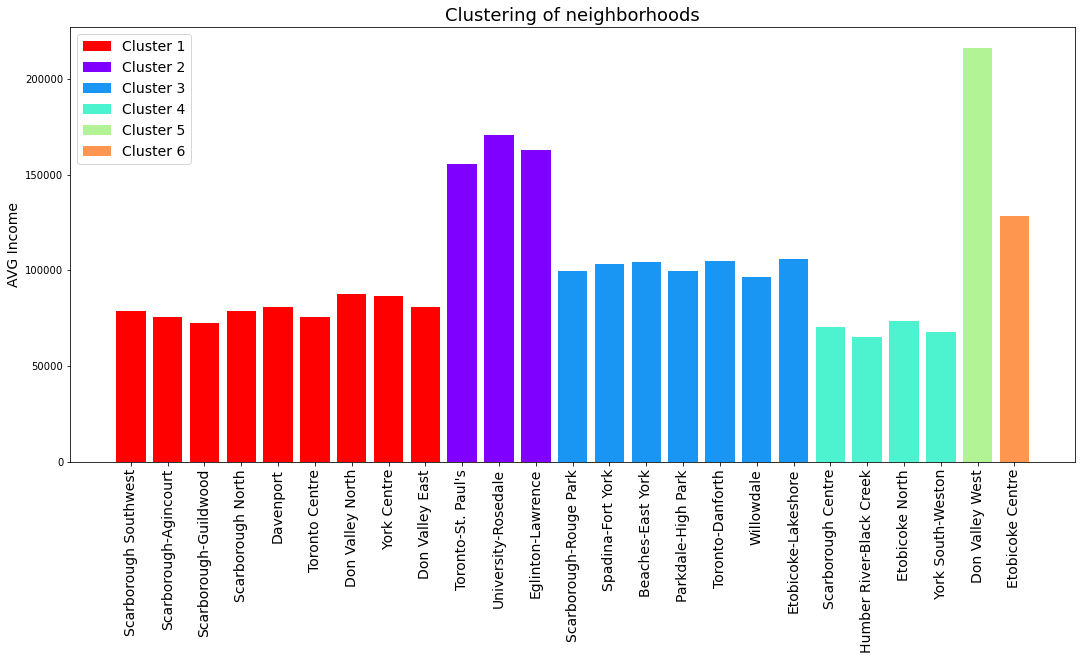

In [73]:

plt.figure(figsize=(18, 8))
g1 = plt.bar(df_cluster1["Neighborhood"], df_cluster1["AVG Income"],color=rainbow[-1])
g2 = plt.bar(df_cluster2["Neighborhood"], df_cluster2["AVG Income"],color=rainbow[0])
g3= plt.bar(df_cluster3["Neighborhood"], df_cluster3["AVG Income"],color=rainbow[1])
g4 = plt.bar(df_cluster4["Neighborhood"], df_cluster4["AVG Income"],color=rainbow[2])
g5= plt.bar(df_cluster5["Neighborhood"], df_cluster5["AVG Income"],color=rainbow[3])
g6= plt.bar(df_cluster6["Neighborhood"], df_cluster6["AVG Income"],color=rainbow[4])
plt.xticks(rotation = 'vertical',fontsize=14)
plt.ylabel('AVG Income',fontsize=14)
plt.title('Clustering of neighborhoods',fontsize=18)
plt.legend([g1,g2,g3,g4,g5,g6],['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6'],fontsize=14)

plt.show()

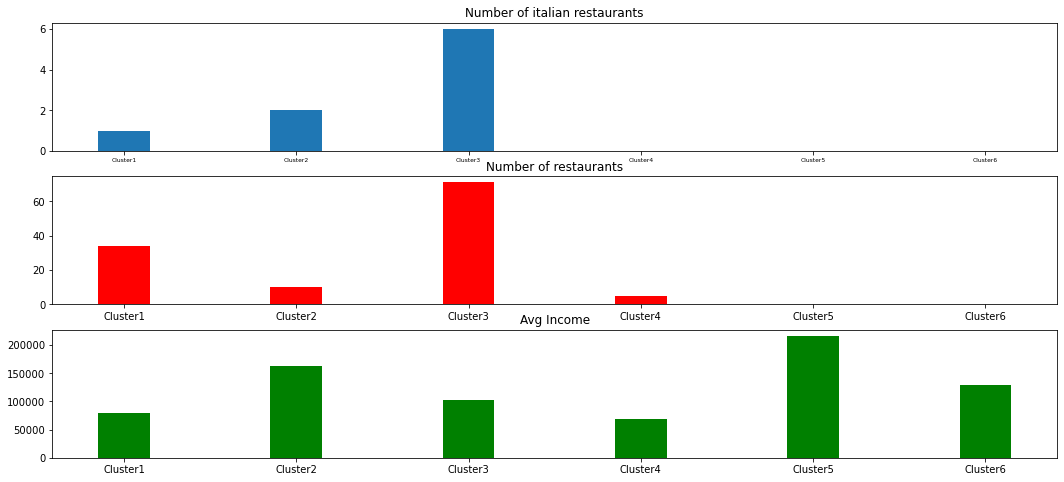

In [74]:
plt.figure(figsize=(18, 8))
clusters=['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6']
avg_income=[df_cluster1['AVG Income'].mean(),df_cluster2['AVG Income'].mean(),df_cluster3['AVG Income'].mean(),df_cluster4['AVG Income'].mean(),df_cluster5['AVG Income'].mean(),df_cluster6['AVG Income'].mean()]
it_resto=[df_cluster1['#Italian Resto'].sum(),df_cluster2['#Italian Resto'].sum(),df_cluster3['#Italian Resto'].sum(),df_cluster4['#Italian Resto'].sum(),df_cluster5['#Italian Resto'].sum(),df_cluster6['#Italian Resto'].sum()]
resto=[df_cluster1['#Total Resto'].sum(),df_cluster2['#Total Resto'].sum(),df_cluster3['#Total Resto'].sum(),df_cluster4['#Total Resto'].sum(),df_cluster5['#Total Resto'].sum(),df_cluster6['#Total Resto'].sum()]


ax1 = plt.subplot(311)
ax1.bar(clusters, it_resto, width=0.3, label='Nb italian Resto')
#ax1.bar(clusters, resto, width=0.3,color='red' ,label='Nb italian Resto')
plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.title('Number of italian restaurants')

ax2 = plt.subplot(312, sharex=ax1)
ax2.bar(clusters, resto, width=0.3,color='red' ,label='Nb italian Resto')
plt.title('Number of restaurants')

# share x only
ax3 = plt.subplot(313, sharex=ax1)
ax3.bar(clusters, avg_income, width=0.3, label='AVG Income',color='green')
plt.title('Avg Income')



plt.show()